# 6.5 Machine learning

### This script contains the following:

#### 1. Importing libraries and data and dropping columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
#importing data
df_rankings = pd.read_csv(r'/Users/nayeraibrahim/Documents/CF assignments/Own Project/rankings_columnsdropped.csv', index_col = False)

In [3]:
#dropping columns
df_rankings2 = df_rankings.drop(columns = ['country','institution'])


#### 2. The elbow technique

In [4]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [5]:
score = [kmeans[i].fit(df_rankings2).score(df_rankings2) for i in range(len(kmeans))]
score

/Users/nayeraibrahim/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nayeraibrahim/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nayeraibrahim/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nayeraibrahim/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

[-1578090771.665388,
 -802752556.8623102,
 -562173183.5372691,
 -352563091.35823953,
 -285240723.93393946,
 -231475623.2441792,
 -207911255.59364998,
 -190679174.27878752,
 -178824317.032404]

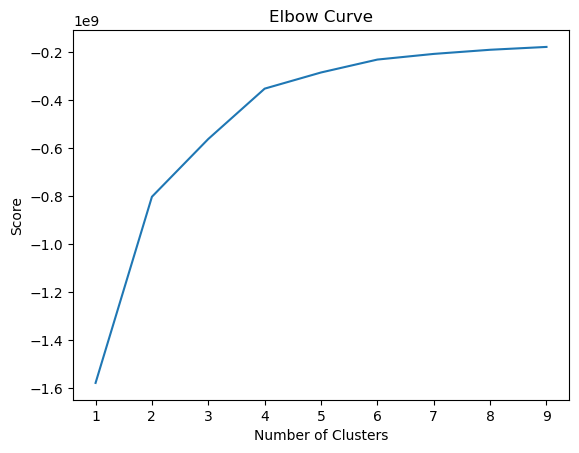

In [6]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [ ]:
# There's a large jump from two to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

### 3. k-means clustering

In [8]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [9]:
# Fit the k-means object to the data.

kmeans.fit(df_rankings2)

/Users/nayeraibrahim/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [11]:
df_rankings2['clusters'] = kmeans.fit_predict(df_rankings2)

/Users/nayeraibrahim/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
df_rankings2.head()

,Unnamed: 0,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,score,year,clusters
0,0,1,1,1,1,1,1,1,1,100.00,2013,2
1,1,2,2,11,2,4,6,2,2,93.94,2013,2
2,2,3,1,7,12,10,11,7,13,92.54,2013,2
3,3,4,3,2,16,2,16,3,3,91.45,2013,2
4,4,5,2,3,15,5,9,11,10,90.24,2013,2


In [14]:
df_rankings2['clusters'].value_counts()

3    604
1    550
2    497
0    449
Name: clusters, dtype: int64

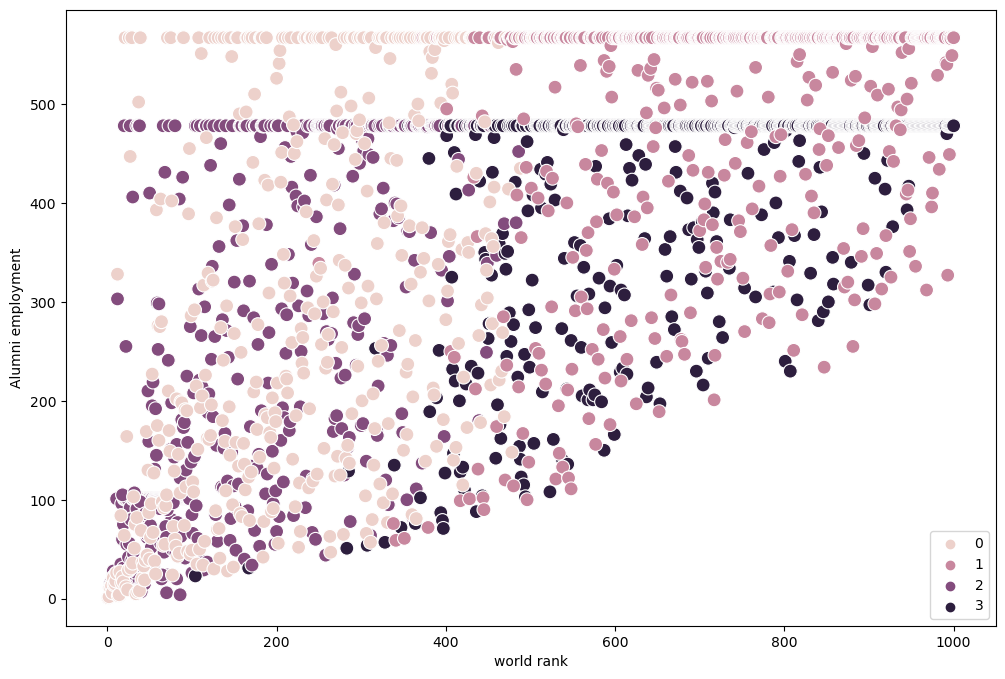

In [15]:
# Plot the clusters for the "world rank" and "alumni empolyment" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_rankings2['world_rank'], y=df_rankings2['alumni_employment'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('world rank') 
plt.ylabel('Alumni employment') 
plt.show()

In [ ]:
#It is hard to infer any insights from this clustering

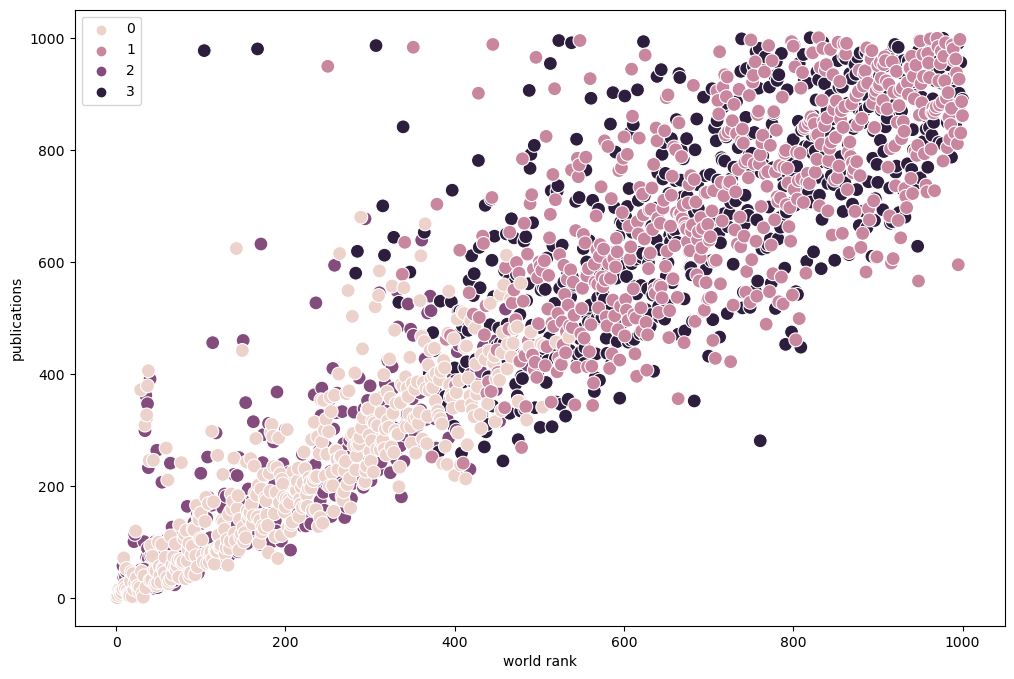

In [16]:
# Plot the clusters for the "world rank" and "publications" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_rankings2['world_rank'], y=df_rankings2['publications'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('world rank') 
plt.ylabel('publications') 
plt.show()

In [ ]:
#It is also hard to infer any insights from this clustering

In [20]:
df_rankings2.groupby('clusters').agg({'quality_of_education':['mean', 'median'], 
                         'alumni_employment':['mean', 'median'], 
                         'quality_of_faculty':['mean', 'median'],
                          'publications':['mean', 'median']})

quality_of_education        alumni_employment         \
                         mean median              mean median   
clusters                                                        
0                  242.289532  286.0        307.583519  286.0   
1                  346.860000  367.0        488.014545  567.0   
2                  192.694165  169.0        238.088531  183.0   
3                  336.504967  355.0        419.329470  478.0   

         quality_of_faculty        publications         
                       mean median         mean median  
clusters                                                
0                166.494432  218.0   236.694878  225.0  
1                216.960000  218.0   714.847273  724.5  
2                136.511066  154.0   181.366197  149.0  
3                208.495033  210.0   689.927152  699.5